# Binomial Regression of NSW Covid test data

This notebook explores the NSW Covid 19 test data to look for patterns ... blah blah

URL: https://data.nsw.gov.au/data/dataset/5424aa3b-550d-4637-ae50-7f458ce327f4/resource/227f6b65-025c-482c-9f22-a25cf1b8594f/download/covid-19-tests-by-date-and-location-and-result.csv

The data are categorised by date and postcode, local health district, local government area, and result. Updated daily. Fetched on Thu 15 Oct 2020 at 5:00pm.

A surge on a given day does not indicate a surge in tests for that day. Test data are updated in batches after a weekend as normal work hours commence, and also as laboratories gain new testing capacity.

The NSW government provides assurances that the data are anonymised and no single person can be identified from the dataset.

Current knowledge is that Melbourne and NSW have had the most positive confirmed cases. We will find the probability of whether a person is likely to test positive based on the region in which they live in NSW, then use the binomial distribution to determine the likelihood that probability is indicative of the realworld; i.e. true.

In [66]:
# load the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import binom
import matplotlib.pyplot as plt

In [10]:
# load in the dataset
# make relevant adjustments to the datatype after inspecting in excel
df = pd.read_csv(
    'covid-19-tests-by-date-and-location-and-result.csv',
    dtype={'postcode': 'Int64', 'lga_code19': 'Int64'},
    parse_dates=['test_date']
)

In [11]:
# inspect the data visually
df.head()

,test_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,result
0,2020-01-01,2039,X700,Sydney,14170,Inner West (A),Tested & excluded
1,2020-01-01,2040,X700,Sydney,14170,Inner West (A),Tested & excluded
2,2020-01-01,2069,X760,Northern Sydney,14500,Ku-ring-gai (A),Tested & excluded
3,2020-01-01,2110,X760,Northern Sydney,14100,Hunters Hill (A),Tested & excluded
4,2020-01-01,2190,X710,South Western Sydney,11570,Canterbury-Bankstown (A),Tested & excluded


In [13]:
df.tail()

,test_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,result
539045,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded
539046,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded
539047,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded
539048,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded
539049,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded


The data appear normal, but it looks like there are sections where the data are completely anonymised. In this case we will assign a new flag in a new column: `anon`.

Note that anonymised data are not people choosing to remain anonymous; rather this is a technique known as differential privacy.

In [25]:
df['anon'] = np.where(df.postcode.isnull(), True, False)

In [26]:
df.head()

,test_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,result,anon
0,2020-01-01,2039,X700,Sydney,14170,Inner West (A),Tested & excluded,False
1,2020-01-01,2040,X700,Sydney,14170,Inner West (A),Tested & excluded,False
2,2020-01-01,2069,X760,Northern Sydney,14500,Ku-ring-gai (A),Tested & excluded,False
3,2020-01-01,2110,X760,Northern Sydney,14100,Hunters Hill (A),Tested & excluded,False
4,2020-01-01,2190,X710,South Western Sydney,11570,Canterbury-Bankstown (A),Tested & excluded,False


In [27]:
df.tail()

,test_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,result,anon
539045,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded,True
539046,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded,True
539047,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded,True
539048,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded,True
539049,2020-06-08,<NA>,NaN,NaN,<NA>,NaN,Tested & excluded,True


In [56]:
df.groupby('lhd_2010_name')['result'].value_counts()

lhd_2010_name          result           
Central Coast          Tested & excluded    23596
                       Case - Confirmed       117
Far West               Tested & excluded     1386
                       Case - Confirmed         2
Hunter New England     Tested & excluded    68244
                       Case - Confirmed       279
Illawarra Shoalhaven   Tested & excluded    24463
                       Case - Confirmed       115
Mid North Coast        Tested & excluded    11016
                       Case - Confirmed        50
Murrumbidgee           Tested & excluded    10300
                       Case - Confirmed        38
Nepean Blue Mountains  Tested & excluded    31901
                       Case - Confirmed       178
Network with Vic       Tested & excluded     1707
                       Case - Confirmed         8
Northern NSW           Tested & excluded    16302
                       Case - Confirmed        55
Northern Sydney        Tested & excluded    67830
         

This gives us an idea of the values to expect, but we're interested in the probability. 

In any case, the probability is the total positive results divided by total tests, for each region. We wish to know how likely it is that the following probabilities are true.

In [62]:
probs = df.result.eq('Case - Confirmed').groupby(df['lhd_2010_name']).mean()
print(probs)

lhd_2010_name
Central Coast            0.004934
Far West                 0.001441
Hunter New England       0.004072
Illawarra Shoalhaven     0.004679
Mid North Coast          0.004518
Murrumbidgee             0.003676
Nepean Blue Mountains    0.005549
Network with Vic         0.004665
Northern NSW             0.003362
Northern Sydney          0.007840
South Eastern Sydney     0.009429
South Western Sydney     0.004746
Southern NSW             0.005593
Sydney                   0.004726
Western NSW              0.003510
Western Sydney           0.005526
Name: result, dtype: float64


We have now ascertained the probability that you will test positive in NSW based on the region that you test in. 

Eyeballing it, if you tested in South Eastern Sydney, you were most likely to test positive, but if you tested in Far West you were least likely to test positive. Hypothetically, this is an indication that the virus, at least as of today, has not penetrated the Far West of NSW as much as other regions *or* that the Far West of NSW has suboptimal conditions for viral spread.

For each region, we assert that `n` is the total number of tests, and `p` is the probability of success in each trial. We are interested in finding the value of `n`, given `k` positive outcomes, for each region.

What can we say about the probability of these probabilities?

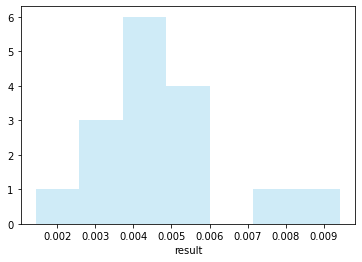

In [65]:
sns.distplot(probs, kde=False, color='skyblue')

Let's first take Far West, where `n` is equal to `1388` and `p` is equal to `2/1388`, or `0.001441`. Let's substitute these into our binomial function and see what it looks like.

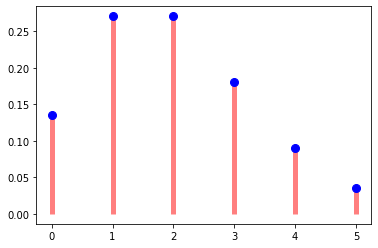

In [71]:
fig, ax = plt.subplots(1,1)
n, p = 1388, 0.001441
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(
    binom.ppf(0.01, n, p),
    binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf for far west')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=.5)

We do not have a lot of data points, but what we see is that we should expect 1 or 2 out of our total sample to test positive, which lines up with our empirical data.

Let's run a quick `np.allclose` check to see if we are accurate. This function checks to see that the cumulative density function is equal to the percentage point function in element-wise order. Essentially: we construct a confidence interval and assert that it is satisfactory. If satisfactory, assert that the result is accurate.

In [69]:
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

Success! Let's check for South Eastern Sydney, which we know has a much larger dataset...

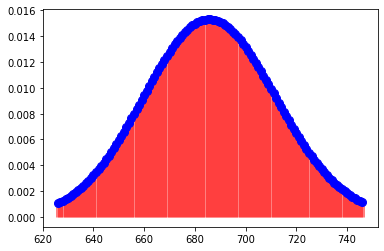

In [72]:
fig, ax = plt.subplots(1,1)
n, p = 72758, 0.009429
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.arange(
    binom.ppf(0.01, n, p),
    binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf for far west')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=.5)

In [73]:
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

Also success! And we get a much prettier graph.